## Library preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelBinarizer




## Load Dataset

In [7]:
# Load dataset
data = pd.read_csv('CitarumWater.csv')
display(data.head())
print("Jumlah data kosong : ")
print(data.isnull().sum())
print("Jumlah data duplikat : ",data.duplicated().sum())



,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


Jumlah data kosong : 
No               0
NamaSungai       0
TitikPantau      0
Waktu            0
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
O2               0
IP               0
Class            0
dtype: int64
Jumlah data duplikat :  0


## Data Cleaning

In [8]:
# Pembersihan data (seperti yang telah dilakukan sebelumnya)
data['Waktu'] = pd.to_datetime(data['Waktu'], errors='coerce')
data['Temp'] = data['Temp'].str.replace('°C', '').astype(float)
data['O2'] = data['O2'].replace({'-': None}).astype(float)
data['Temp'] = data['Temp'].astype(float)

# Mengisi nilai hilang untuk O2 dengan rata-rata
data['O2'].fillna(data['O2'].mean(), inplace=True)



<ipython-input-8-243b38088727>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Waktu'] = pd.to_datetime(data['Waktu'], errors='coerce')
<ipython-input-8-243b38088727>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['O2'].fillna(data['O2'].mean(), inplace=True)


## Data Splitting

In [9]:
# Memilih fitur (X) dan target (y)
X = data[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']]  # Fitur
y = data['Class']  # Target

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000)



## Training

In [10]:
# Melatih model
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

## Data Evaluation

Akurasi:  0.958
Presisi:  0.9581014492753622
Recall:  0.958
F1-Score:  0.9578799711093655
AUC:  0.9983523302013703


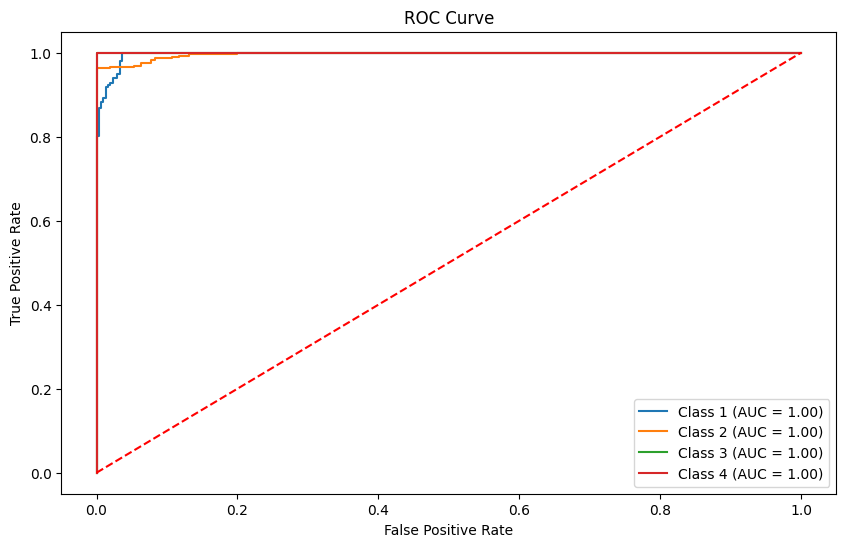

In [11]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# Menampilkan metrik evaluasi
print("Akurasi: ", accuracy)
print("Presisi: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("AUC: ", roc_auc)

# Membinarisasi target (y_test) untuk klasifikasi multikelas
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Prediksi probabilitas untuk semua kelas
y_pred_prob = model.predict_proba(X_test)

# Menyiapkan plot
plt.figure(figsize=(10, 6))

# Menghitung dan memplot ROC Curve untuk setiap kelas
for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc_class = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {0} (AUC = {1:.2f})'.format(lb.classes_[i], roc_auc_class))

# Menambahkan garis diagonal untuk random classifier
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

# Menambahkan label dan judul
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Penjelasan Matematis dari Metrik Evaluasi:

# Akurasi (Accuracy) = (TP + TN) / (TP + TN + FP + FN)
# Presisi (Precision) = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1-Score = 2 * (Presisi * Recall) / (Presisi + Recall)
# AUC (Area Under Curve) = Area di bawah ROC curve, mengukur kemampuan model dalam membedakan kelas

# Akurasi
Accuracy mengukur seberapa sering model melakukan prediksi yang benar (baik benar positif maupun benar negatif) dibandingkan dengan total prediksi.

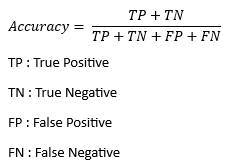

# Presisi
Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua prediksi positif (True Positives + False Positives).

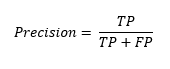

# Recall
Recall mengukur seberapa baik model dapat mengidentifikasi semua instance positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua instance positif yang sebenarnya (True Positives + False Negatives).

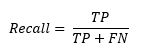

#F1-Score
F1-Score adalah harmonic mean dari Precision dan Recall. Ini memberikan keseimbangan antara Precision dan Recall.

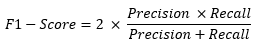

# AUC-ROC
AUC-ROC adalah metrik yang mengukur performa model klasifikasi dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai threshold.

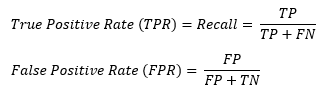

AUC adalah area di bawah kurva ROC. Nilainya berkisar antara 0 dan 1:
* AUC = 1: Model sempurna.
* AUC = 0.5: Model tidak lebih baik dari tebakan acak.
* AUC < 0.5: Model performanya buruk.